<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Logistic Regression Implementation</h1>
</div>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

In [27]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load Data</h2>
</div>

In [28]:
churn_data = pd.read_csv('Datasets/churn_df_balanced.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Undertanding the Data</h2>
</div>

In [29]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15926 non-null  int64  
 1   Surname          15926 non-null  object 
 2   CreditScore      15926 non-null  int64  
 3   Geography        15926 non-null  object 
 4   Gender           15926 non-null  object 
 5   Age              15926 non-null  int64  
 6   Tenure           15926 non-null  int64  
 7   Balance          15926 non-null  float64
 8   NumOfProducts    15926 non-null  int64  
 9   HasCrCard        15926 non-null  int64  
 10  IsActiveMember   15926 non-null  int64  
 11  EstimatedSalary  15926 non-null  float64
 12  Exited           15926 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.6+ MB


In [30]:
churn_data.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.592600e+04  15926.000000  15926.000000  15926.000000   15926.000000   
mean   1.569056e+07    648.624137     41.119365      4.944807   82267.968716   
std    7.203550e+04     98.441671     10.564643      2.900446   61182.372640   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562883e+07    581.000000     34.000000      2.000000       0.000000   
50%    1.568953e+07    650.000000     40.000000      5.000000  103292.905000   
75%    1.575309e+07    717.000000     48.000000      7.000000  129255.200000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts     HasCrCard  IsActiveMember  EstimatedSalary  \
count   15926.000000  15926.000000    15926.000000     15926.000000   
mean        1.513249      0.699360        0.460756    100560.217395   
std         0.674855      0.458551        0.498473     57524.925926   
min         1.000000      0.000000        0.000000        11.580000   
25%         1.000000      0.000000        0.000000     51467.920000   
50%         1.000000      1.000000        0.000000    100722.720000   
75%         2.000000      1.000000        1.000000    149912.280000   
max         4.000000      1.000000        1.000000    199992.480000   

             Exited  
count  15926.000000  
mean       0.500000  
std        0.500016  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000

In [31]:
churn_data.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [32]:
num_col = churn_data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = churn_data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: 
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data pre - processing</h2>
</div>

In [33]:
## let's drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [34]:
# Let's do one hot encoding for the column `Geo` as Logistic Regression model would be expecting numeric features
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [35]:
# Rather than using one hot encoding we can do label encoding as well. Here let's use replace function rather than label encoder
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [36]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geo_France  Geo_Germany  Geo_Spain  
0               1        101348.88       1           1            0          0  
1               1        112542.58       0           0            0          1  
2               0        113931.57       1           1            0          0  
3               0         93826.63       0           1            0          0  
4               1         79084.10       0           0            0          1

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

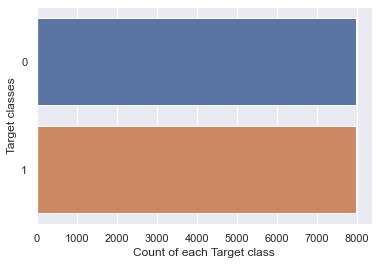

In [37]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

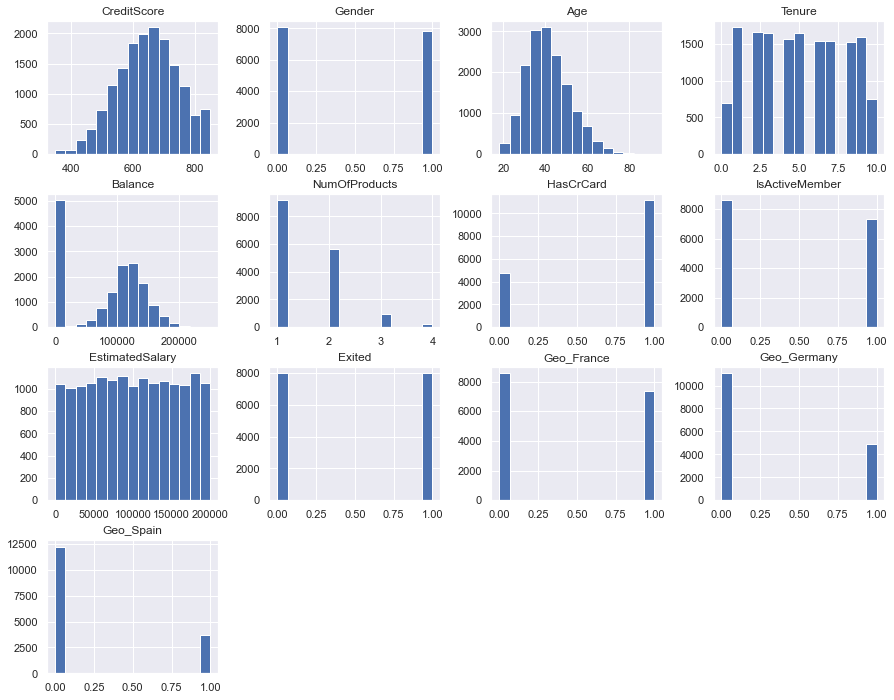

In [38]:
# Check the distribution of all the features

churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

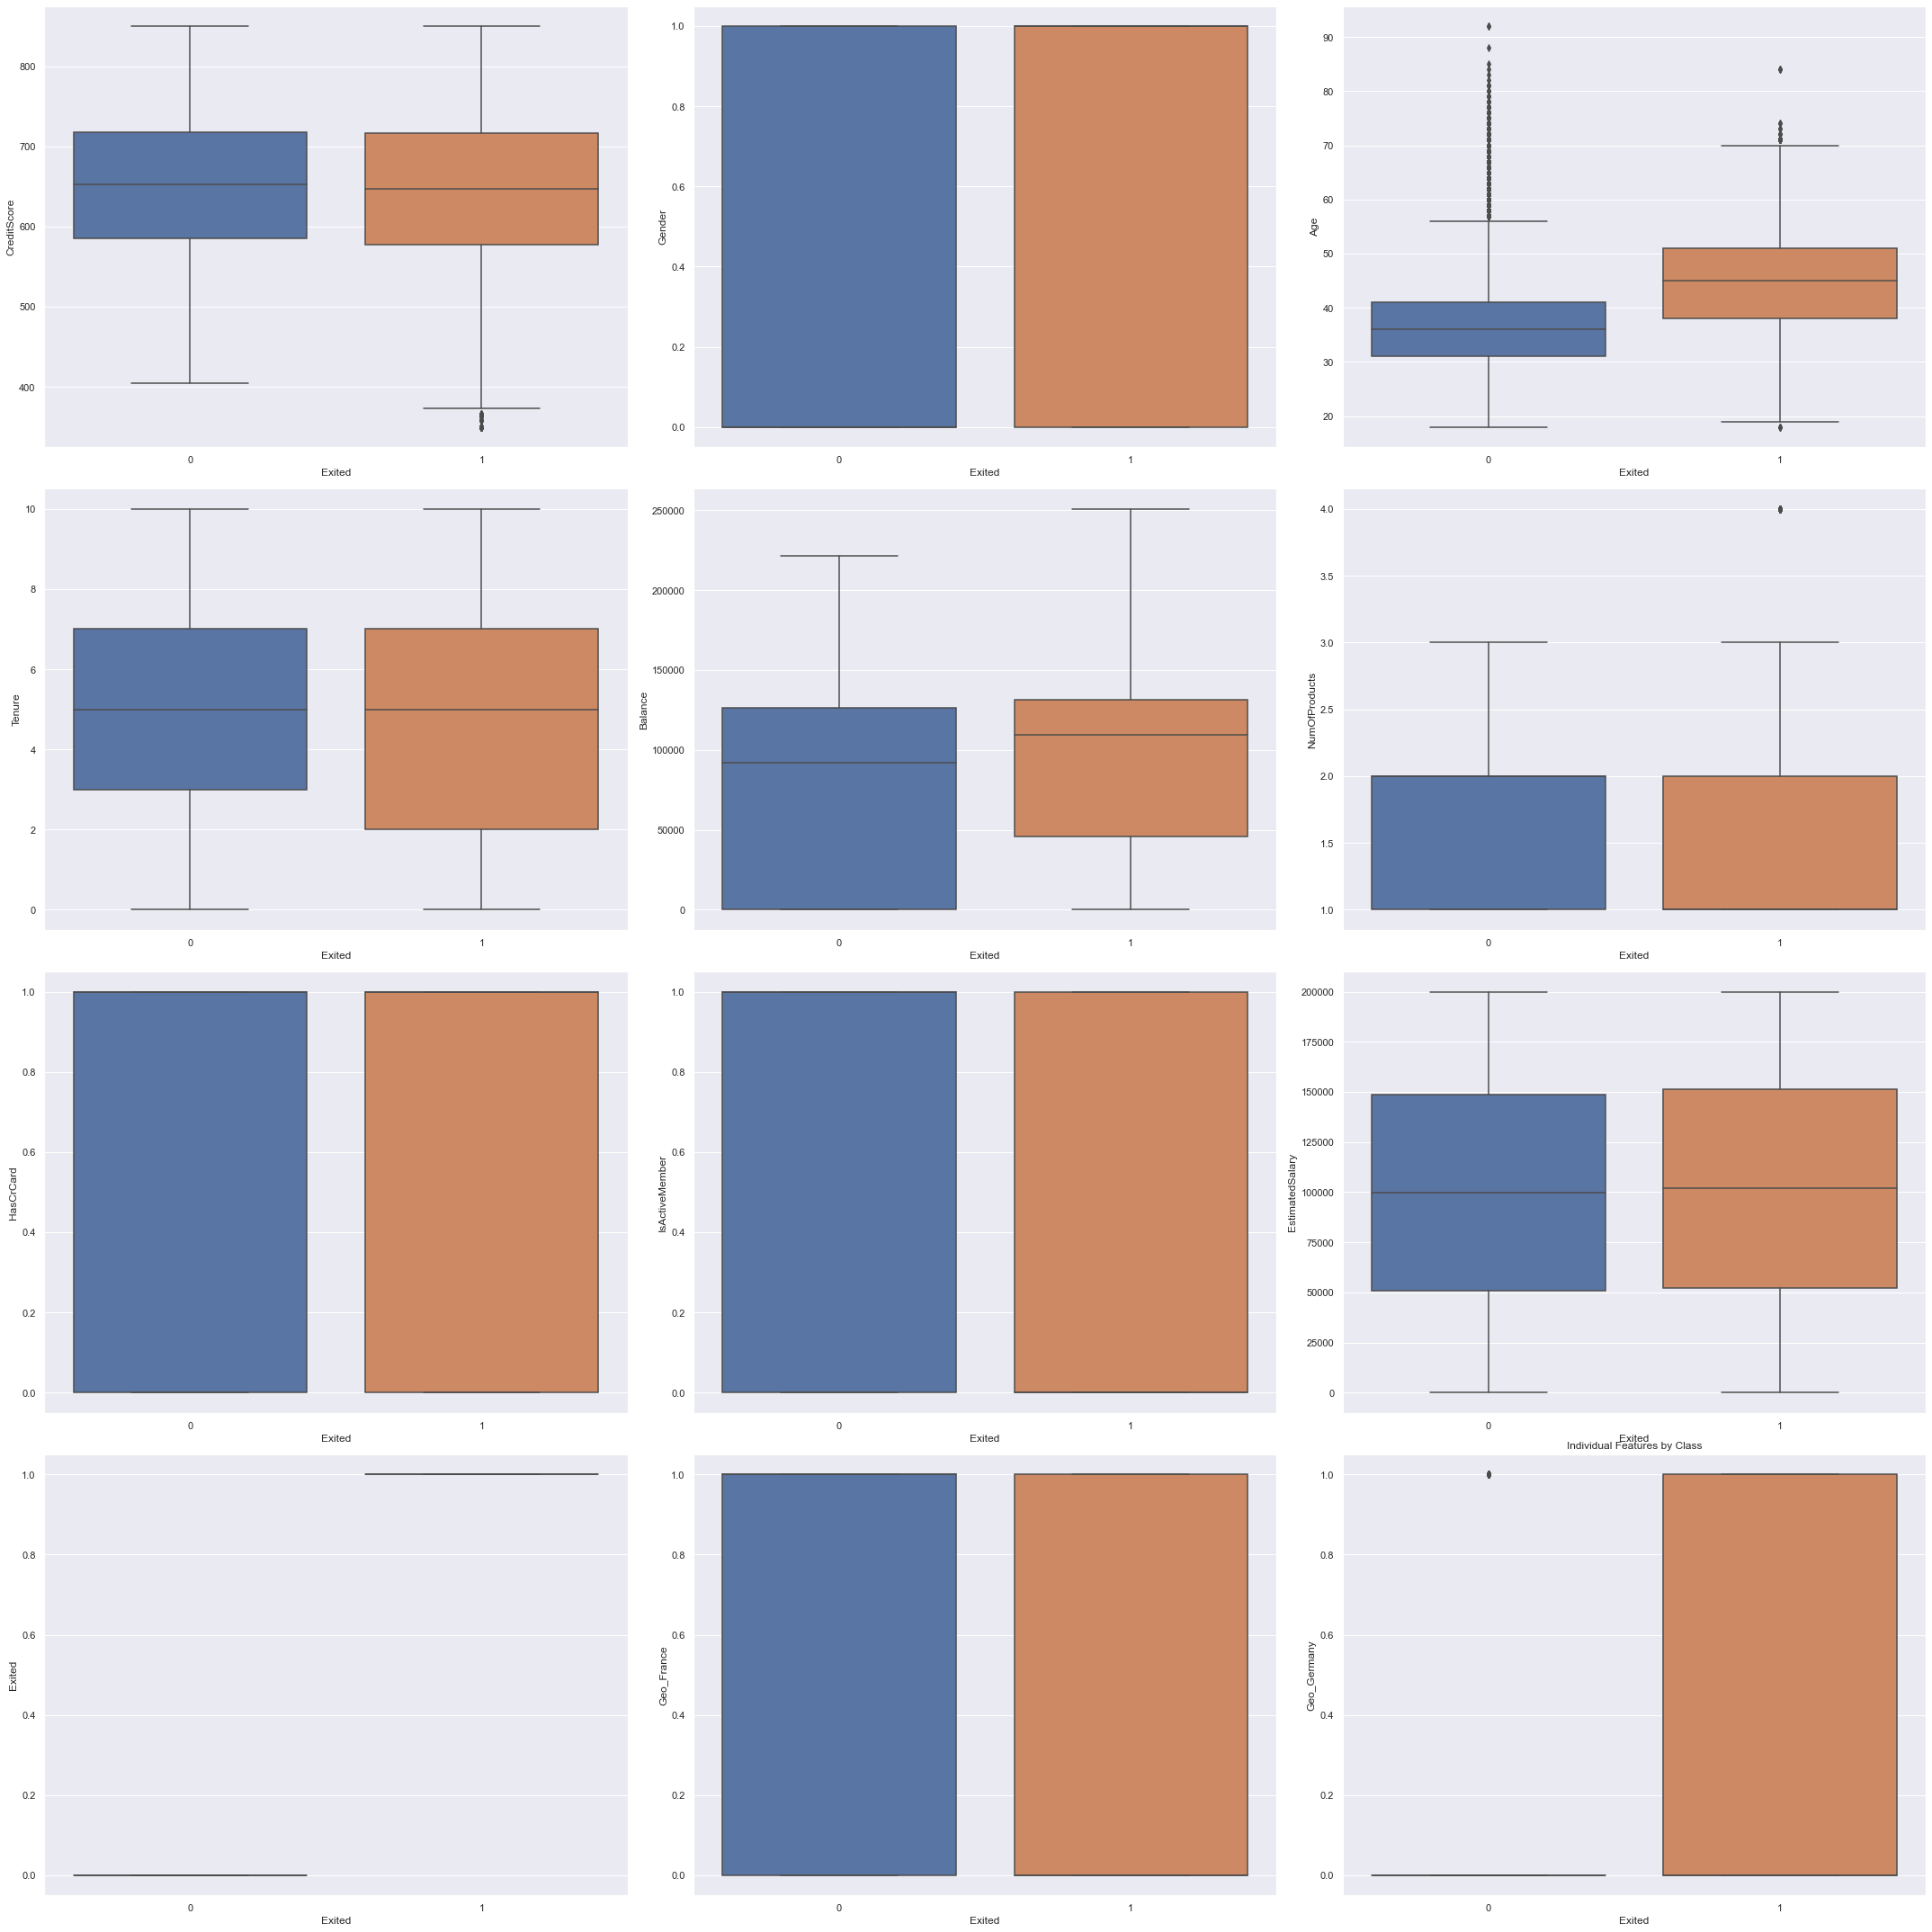

In [39]:
# Let's check the distribution of y variable corresponding to every feature/x variable 

fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

In [40]:
# Split the y variable series and x variables dataset

X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [42]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Classification

In [43]:

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)



LogisticRegression()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predictions and Performance Metric</h2>
</div>

In [44]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

y_pred0

array([1, 1, 1, ..., 1, 1, 0])

### 1. Accuracy

In [45]:
# Checking the performance of logistic regression model

score_lr = lr.score(X_test, y_test)
print(score_lr)

0.7102359208523592


<a id="1"></a> <br>
### 2. Confusion Metric

In [46]:
# Python script for confusion matrix creation. 

actual = y_test
predicted = y_pred0 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[1863  761]
 [ 762 1870]]


#### `Summary` : 

The columns in the confusion matrix are the count of predicted 0’s and 1’s (from y_pred0), while, the rows are the actuals (from y_test).

So, you have 1866 out of 2624 `0` instances predicted as `0` and 1870 out of 2632 `1` instances predicted as `1`. This is good.

Secondly, look at the 761 in top-right of the table. This means the model predicted 761 instance as `1` which were actually `0`.

Also, the model predicted 762 instances as `0` when the real value is `1`.

<a id="2"></a> <br>
### 3. Accuracy Precision Recall F1 Score

In [47]:
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2624
           1       0.71      0.71      0.71      2632

    accuracy                           0.71      5256
   macro avg       0.71      0.71      0.71      5256
weighted avg       0.71      0.71      0.71      5256



<a id="4"></a> <br>
### 4. ROC curve

Often, choosing the best model is sort of a balance between predicting the one's accurately or the zeroes accurately. In other words sensitivity and specificity.

But it would be great to have something that captures both these aspects in one single metric.

This is nicely captured by the 'Receiver Operating Characteristics' curve, also called as the ROC curve. In fact, the area under the ROC curve can be used as an evaluation metric to compare the efficacy of the models.

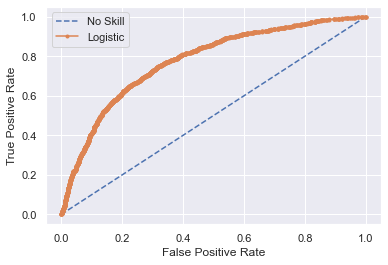

In [48]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### `Summary : `

Interpreting the ROC plot is very different from a regular line plot. Because, though there is an X and a Y-axis, you don't read it as: for an X value of 0.25, the Y value is .9.

Instead, what we have here is a line that traces the probability cutoff from 1 at the bottom-left to 0 in the top right.

This is a way of analyzing how the sensitivity and specificity perform for the full range of probability cutoffs, that is from 0 to 1.

Ideally, if you have a perfect model, all the events will have a probability score of 1 and all non-events will have a score of 0. For such a model, the area under the ROC will be a perfect 1.

So, if we trace the curve from bottom left, the value of probability cutoff decreases from 1 towards 0. If you have a good model, more of the real events should be predicted as events, resulting in high sensitivity and low FPR. In that case, the curve will rise steeply covering a large area before reaching the top-right.

Therefore, the larger the area under the ROC curve, the better is your model.

<a id="5"></a> <br>
### 5. AUC

The area under ROC curve is known as AUC, it's values goes from 0.5 to 1, if somehow the value is less that 0.5, that means we are predicting in the wrong direction and we can alter the prediction outputs, hence the AUC would be 1 - AUC initial, now it would be greater than 0.5

In [49]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.777
